In [1]:
!pip install --upgrade azure-cognitiveservices-vision-computervision

In [2]:
!pip install pillow

In [29]:
from azure.cognitiveservices.vision.computervision import ComputerVisionClient
from azure.cognitiveservices.vision.computervision.models import OperationStatusCodes, VisualFeatureTypes
from msrest.authentication import CognitiveServicesCredentials
from array import array
import os
from PIL import Image
import sys
import time
import requests

In [12]:
subcription_key='d86291b2704d415484da9775ebf80883'
endpoint='https://task4p-v1.cognitiveservices.azure.com/'
computervision_client=ComputerVisionClient(endpoint,CognitiveServicesCredentials(subcription_key))

In [ ]:
subcription_key='3b17f655290a4cfd819331d65a4f2079'
endpoint='https://task4p-computervision.cognitiveservices.azure.com/'
computervision_client=ComputerVisionClient(endpoint,CognitiveServicesCredentials(subcription_key))

In [13]:
image_url='https://raw.githubusercontent.com/Azure-Samples/cognitive-services-sample-data-files/master/ComputerVision/Images/landmark.jpg'

In [14]:
image_url='https://raw.githubusercontent.com/Azure-Samples/cognitive-services-sample-data-files/master/ComputerVision/Images/celebrities.jpg'

In [15]:
image_url='https://raw.githubusercontent.com/Azure-Samples/cognitive-services-sample-data-files/master/ComputerVision/Images/dog.jpg'

In [16]:
description_result=computervision_client.describe_image(image_url)

if (len(description_result.captions)==0):
    print("No description detected")
else:
    for caption in description_result.captions:
        print("{} with confidence {:2f}%".format(caption.text,caption.confidence*100))

a dog sitting on a dock with confidence 56.551951%


In [17]:
image_features=["categories"]
categorize_results=computervision_client.analyze_image(image_url,image_features)

if (len(categorize_results.categories)==0):
    print("No description detected")
else:
    for category in categorize_results.categories:
        print("{} with confidence {:2f}%".format(category.name,category.score*100))

abstract_ with confidence 0.390625%
others_ with confidence 2.343750%


In [18]:
tag_results=computervision_client.tag_image(image_url)

if (len(tag_results.tags)==0):
    print("No description detected")
else:
    for tag in tag_results.tags:
        print("{} with confidence {:2f}%".format(tag.name,tag.confidence*100))

dog breed with confidence 97.746038%
sky with confidence 96.119100%
outdoor with confidence 96.013069%
dog with confidence 87.972355%
pet with confidence 87.923235%
animal with confidence 80.489749%
ground with confidence 77.170777%
brown with confidence 74.361181%
wooden with confidence 66.545928%
mammal with confidence 58.187640%


In [19]:
image_url='https://raw.githubusercontent.com/Azure-Samples/cognitive-services-sample-data-files/master/ComputerVision/Images/celebrities.jpg'

detect_object_results=computervision_client.detect_objects(image_url)

if (len(detect_object_results.objects)==0):
    print("No description detected")
else:
    for obj in detect_object_results.objects:
        print("Object name {} with confidence {:2f}% at location {},{},{},{}".format(obj.object_property, obj.confidence*100, 
                                                                                     obj.rectangle.x, 
                                                                                     obj.rectangle.x + obj.rectangle.w, 
                                                                                    obj.rectangle.y, 
                                                                                    obj.rectangle.y + obj.rectangle.h))

Object name shirts with confidence 52.600000% at location 561,720,126,323
Object name Jeans with confidence 54.000000% at location 562,711,309,512
Object name person with confidence 71.900000% at location 10,188,70,509
Object name person with confidence 81.500000% at location 200,383,77,507
Object name person with confidence 89.300000% at location 391,570,74,506
Object name person with confidence 88.600000% at location 548,733,62,511


In [20]:
image_url='https://raw.githubusercontent.com/Azure-Samples/cognitive-services-sample-data-files/master/ComputerVision/Images/gray-shirt-logo.jpg'

image_features=["brands"]

detect_brand_results=computervision_client.analyze_image(image_url,image_features)

if (len(detect_brand_results.brands)==0):
    print("No description detected")
else:
    for brand in detect_brand_results.brands:
        print("Brand name '{}' with confidence {:2f}% at location {},{},{},{}".format(brand.name, brand.confidence*100, 
                                                                                     brand.rectangle.x, 
                                                                                     brand.rectangle.x + brand.rectangle.w, 
                                                                                    brand.rectangle.y, 
                                                                                    brand.rectangle.y + brand.rectangle.h))

Brand name 'Microsoft' with confidence 62.500000% at location 58,113,106,152
Brand name 'Microsoft' with confidence 69.800000% at location 58,260,86,149


In [21]:
image_url='https://raw.githubusercontent.com/Azure-Samples/cognitive-services-sample-data-files/master/ComputerVision/Images/faces.jpg'

detect_domain_results=computervision_client.analyze_image_by_domain("celebrities",image_url)

if (len(detect_domain_results.objects)==0):
    print("No description detected")
else:
    for celeb in detect_domain_results.objects:
        print("Celebrity name = {}".format(celeb["name"]))

ComputerVisionErrorResponseException: (InvalidRequest) Feature is not supported. Please apply for access at https://aka.ms/celebrityrecognition

In [22]:
image_type_url='https://raw.githubusercontent.com/Azure-Samples/cognitive-services-sample-data-files/master/ComputerVision/Images/type-image.jpg'

image_features=[VisualFeatureTypes.image_type]
detect_type_results=computervision_client.analyze_image(image_type_url,image_features)

if detect_type_results.image_type.clip_art_type == 0:
    print("Image is not a clip art")
elif detect_type_results.image_type.line_drawing_type == 1:
    print("Image is ambiguously clip art")
elif detect_type_results.image_type.line_drawing_type == 2:
    print("Image is normal clip art")
else:
    print("Image is good clip art")

if detect_type_results.image_type.line_drawing_type == 0:
    print("Image is not a line drawing")
else:
    print("Image is a line drawing")

Image is good clip art
Image is not a line drawing


In [39]:
region = "eastus"
api_key = "d86291b2704d415484da9775ebf80883"
path_to_file = "C:/Users/srile/Desktop/pic1.JPEG"

# Read file
with open(path_to_file, 'rb') as f:
    data = f.read()

# Set request headers
headers = dict()
headers['Ocp-Apim-Subscription-Key'] = api_key
headers['Content-Type'] = 'application/octet-stream'

# Set request query string parameters
params = {'visualFeatures': 'Color,Categories,Tags,Description,ImageType,Faces,Adult,Objects'}

endpoint='https://task4p-computervision.cognitiveservices.azure.com/'
computervision_client=ComputerVisionClient(endpoint,CognitiveServicesCredentials(subcription_key))

# Make request and process response
response = requests.request('post', "https://{}.api.cognitive.microsoft.com/vision/v1.0/analyze".format(region), 
                            data=data, headers=headers, params=params)

if response.status_code == 200 or response.status_code == 201:

    if 'content-length' in response.headers and int(response.headers['content-length']) == 0:
        result = None
    elif 'content-type' in response.headers and isinstance(response.headers['content-type'], str):
        if 'application/json' in response.headers['content-type'].lower():
            result = response.json() if response.content else None
        elif 'image' in response.headers['content-type'].lower():
            result = response.content

        print(result)
else:

    print("Error code: %d" % response.status_code)
    print("Message: %s" % response.json())

{'categories': [{'name': 'people_', 'score': 0.6484375}], 'adult': {'isAdultContent': False, 'isRacyContent': False, 'adultScore': 0.0024421154521405697, 'racyScore': 0.005906724836677313}, 'color': {'dominantColorForeground': 'Orange', 'dominantColorBackground': 'Grey', 'dominantColors': ['Grey', 'White'], 'accentColor': '906D3B', 'isBwImg': False, 'isBWImg': False}, 'imageType': {'clipArtType': 0, 'lineDrawingType': 0}, 'tags': [{'name': 'person', 'confidence': 0.993121862411499}, {'name': 'pumpkin', 'confidence': 0.9793171882629395}, {'name': 'halloween', 'confidence': 0.96912682056427}, {'name': 'squash', 'confidence': 0.952329158782959}, {'name': 'fall', 'confidence': 0.9235569834709167}, {'name': 'vegetable', 'confidence': 0.9024257063865662}, {'name': 'fruit', 'confidence': 0.8762329816818237}, {'name': 'calabaza', 'confidence': 0.8075798153877258}, {'name': 'girl', 'confidence': 0.7948442697525024}, {'name': 'cucurbita', 'confidence': 0.7598340511322021}, {'name': 'winter squas

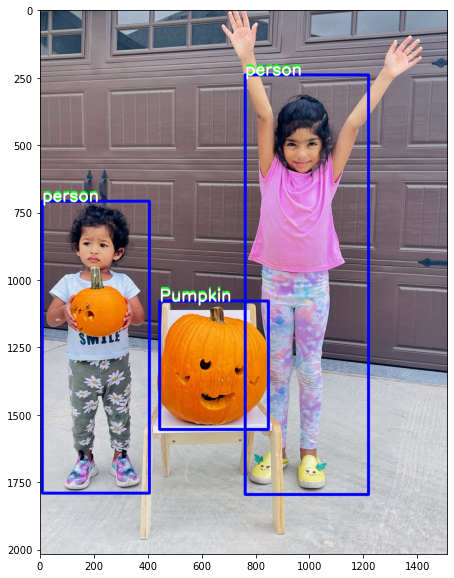

In [57]:
import cv2
import matplotlib.pyplot as plt

im = cv2.imread(path_to_file)

plt.figure(figsize=(10, 10))
obj_dict=result['objects']
for obj in obj_dict:
    obj_rect=obj['rectangle']
    obj_name=obj['object']
    x1 = obj_rect['x']
    x2 = obj_rect['x']+obj_rect['w']
    y1 = obj_rect['y']
    y2 = obj_rect['y']+obj_rect['h']
    cv2.rectangle(im, (x1,y1), (x2,y2), (255,0,0), 9) 
    cv2.putText(im, obj_name, (x1, y1 - 7), cv2.FONT_HERSHEY_SIMPLEX, 2, (36,255,12), 5)
    cv2.putText(im, obj_name, (x1, y1), cv2.FONT_HERSHEY_SIMPLEX, 2, (255,255,255), 5)


plt.imshow(cv2.cvtColor(im,cv2.COLOR_BGR2RGB))

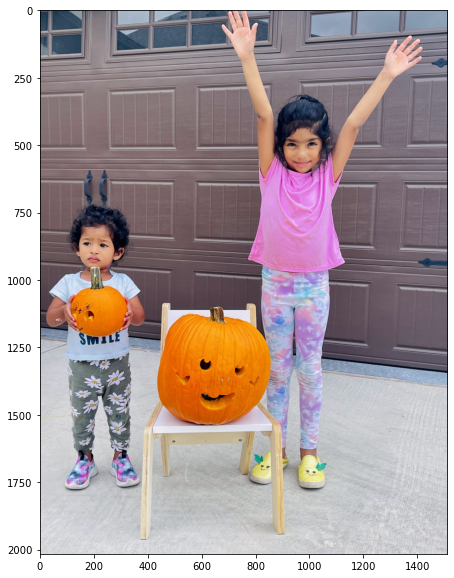

In [101]:
import cv2
import matplotlib.pyplot as plt

path_to_file = "C:/Users/srile/Desktop/pic1.JPEG"
im = cv2.imread(path_to_file)
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(im,cv2.COLOR_BGR2RGB))

In [58]:
import cv2
import time
import os
from matplotlib import pyplot as plt
time_start = time.time()

In [85]:
def video_to_frames(input_loc, output_loc):
    """Function to extract frames from input video file
    and save them as separate frames in an output directory.
    Args:
        input_loc: Input video file.
        output_loc: Output directory to save the frames.
    Returns:
        None
    """
    try:
        os.mkdir(output_loc)
    except OSError:
        pass
    # Log the time
    time_start = time.time()
    # Start capturing the feed
    cap = cv2.VideoCapture(input_loc)
    
    print(int(cap.get(cv2.CAP_PROP_FRAME_COUNT)))
    # Find the number of frames
    video_length = int(cap.get(cv2.CAP_PROP_FRAME_COUNT)) - 1
    print ("Number of frames: ", video_length)
    count = 0
    print ("Converting video..\n")
    # Start converting the video
    while cap.isOpened():
        # Extract the frame
        ret, frame = cap.read()
        if not ret:
            continue
        # Write the results back to output location.
        #cv2.imwrite(output_loc + "/%#05d.jpg" % (count+1), frame)
        cv2.imwrite(output_loc + filename + "%d.jpg" % (count+1), frame)
        #cv2.imshow("Tracking", frame)
        count = count + 1
        # If there are no more frames left
        if (count > (video_length-1)):
            # Log the time again
            time_end = time.time()
            # Release the feed
            cap.release()
            # Print stats
            print ("Done extracting frames.\n%d frames extracted" % count)
            print ("It took %d seconds forconversion." % (time_end-time_start))
            break

In [93]:
!pip install pafy

In [96]:
!pip install --upgrade youtube-dl

In [99]:
!pip install -U youtube-dl

In [100]:
import pafy as pafy
if __name__=="__main__":
    input_loc = 'https://youtu.be/MNn9qKG2UFI'
    #input_loc = 'C:/Users/srile/Desktop/MDS/Assignments/Task 4.1P/road_traffic.mp4'
    output_loc = 'vehicles/'
    vlink = pafy.new(input_loc)
    play = vlink.getbest()
    cap = cv2.VideoCapture(play.url)
    #print(cap)
        
    print(int(cap.get(cv2.CAP_PROP_FRAME_COUNT)))
    # Find the number of frames
    video_length = int(cap.get(cv2.CAP_PROP_FRAME_COUNT)) - 1
    print ("Number of frames: ", video_length)
    count = 0

    #video_to_frames(input_loc, output_loc)
    


ERROR: Unable to extract uploader id; please report this issue on https://yt-dl.org/bug . Make sure you are using the latest version; see  https://yt-dl.org/update  on how to update. Be sure to call youtube-dl with the --verbose flag and include its complete output.


OSError: ERROR: Unable to extract uploader id; please report this issue on https://yt-dl.org/bug . Make sure you are using the latest version; see  https://yt-dl.org/update  on how to update. Be sure to call youtube-dl with the --verbose flag and include its complete output.

In [88]:
input_loc='C:/Users/srile/Desktop/MDS/Assignments/Task 4.1P/road_traffic.mp4'
cap = cv2.VideoCapture(input_loc)

while(cap.isOpened()):
    ret, image = cap.read()    
    loadedImage = cv2.imdecode(image, cv2.IMREAD_COLOR)
    print(loadedImage)
    cv2.imshow('frame',loadedImage)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

In [91]:
import pixellib
from pixellib.instance import instance_segmentation
import cv2

segment_video = instance_segmentation()
segment_video.process_video("/kaggle/input/road-traffic-video-monitoring/traffic_video.avi", show_bboxes = True, frames_per_second= 15, output_video_name="traffic_monitor.mp4")

Processed 1 frames in 0.0 seconds


UnboundLocalError: local variable 'seg' referenced before assignment